In [47]:
# I recommend using the requirements file for venv creation, but we will be using pandas, seaborn, matplotlib, and scikitlearn for this project.
import pandas
import seaborn as sns
from matplotlib import pyplot as plt

# Part 1: Getting the Data

In [48]:
# get the data
data = pandas.read_csv(
	"https://raw.githubusercontent.com/NicholasZolton/MLAssignment1/main/data/winequality-red.csv",
	header=0,
	delimiter=";",
)

# Part 2: Data Pre-Processing

In [49]:
# print the data
print("Data Overview:")
print(data.describe())

Data Overview:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.

In [50]:

# print any missing values
print("Checking for missing values:")
print(data.isnull().sum())

Checking for missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [51]:
# print the data types (check for non-numeric data)
print("Data Types:")
print(data.dtypes)

Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [52]:

# check if any rows are identical
print("Checking for duplicate rows:")
print(data.duplicated().sum())

Checking for duplicate rows:
240


In [53]:
# remove the duplicates
print("Removing duplicates...")
data.drop_duplicates(inplace=True)

Removing duplicates...


In [54]:
# check if any rows are identical
print("Checking for duplicate rows:")
print(data.duplicated().sum())

Checking for duplicate rows:
0


Correlation:


<Axes: >

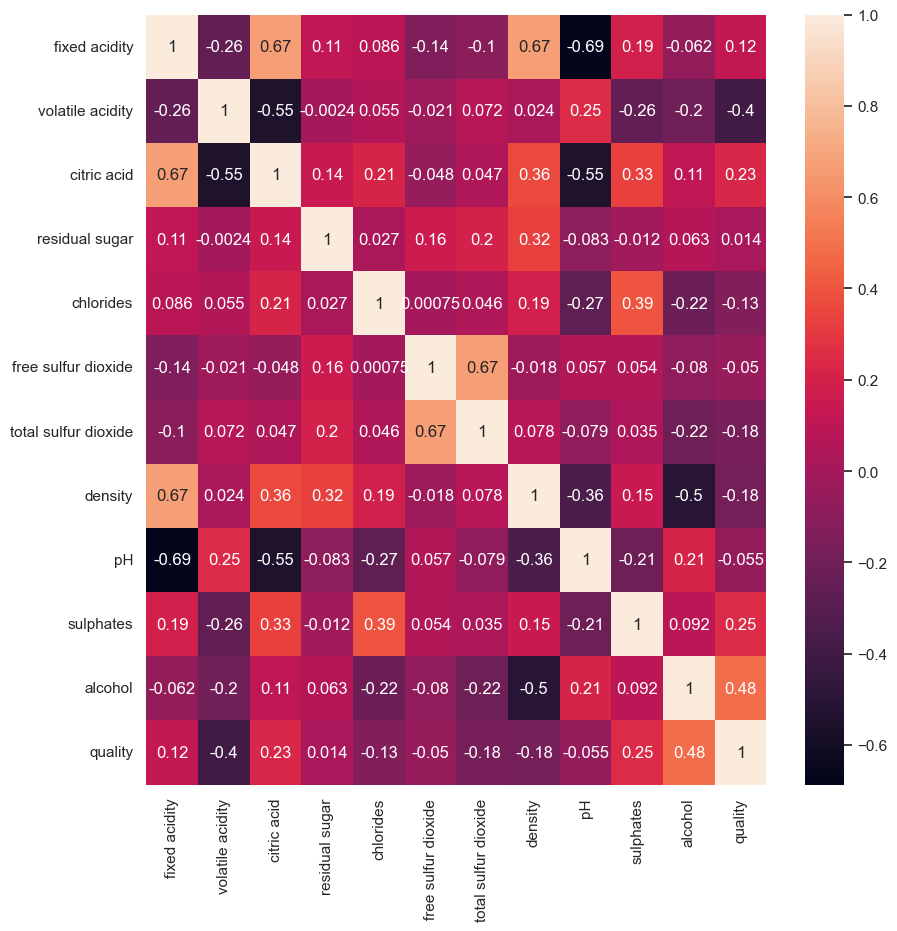

In [55]:
# check correlation
print("Correlation:")
plt.figure(figsize=(10, 10))
sns.heatmap(data=data.corr(), annot=True, )

It looks like there are a few fields which have an insignificant impact on the quality. These fields are:

- pH
- free sulfur dioxide
- residual sugar

For now, I will remove these fields and see how the model performs.

In [56]:
# remove the fields with little correlation
print("Removing fields with little correlation...")
data = data.drop(columns=["pH", "free sulfur dioxide", "residual sugar"])
print(data.describe())

Removing fields with little correlation...
       fixed acidity  volatile acidity  citric acid    chlorides  \
count    1359.000000       1359.000000  1359.000000  1359.000000   
mean        8.310596          0.529478     0.272333     0.088124   
std         1.736990          0.183031     0.195537     0.049377   
min         4.600000          0.120000     0.000000     0.012000   
25%         7.100000          0.390000     0.090000     0.070000   
50%         7.900000          0.520000     0.260000     0.079000   
75%         9.200000          0.640000     0.430000     0.091000   
max        15.900000          1.580000     1.000000     0.611000   

       total sulfur dioxide      density    sulphates      alcohol  \
count           1359.000000  1359.000000  1359.000000  1359.000000   
mean              46.825975     0.996709     0.658705    10.432315   
std               33.408946     0.001869     0.170667     1.082065   
min                6.000000     0.990070     0.330000     8.4000

In [57]:
from sklearn.preprocessing import StandardScaler
# now we need to normalize the data
print('Normalizing data...')
scaler = StandardScaler()
data = pandas.DataFrame(scaler.fit_transform(data), columns=data.columns)

Normalizing data...


In [58]:
# print the normalized data
print('Normalized Data:')
print(data.describe())

Normalized Data:
       fixed acidity  volatile acidity   citric acid     chlorides  \
count   1.359000e+03      1.359000e+03  1.359000e+03  1.359000e+03   
mean   -6.274108e-16      1.463959e-16  2.091369e-17  4.182739e-17   
std     1.000368e+00      1.000368e+00  1.000368e+00  1.000368e+00   
min    -2.137008e+00     -2.238023e+00 -1.393258e+00 -1.542254e+00   
25%    -6.972071e-01     -7.623226e-01 -9.328165e-01 -3.671819e-01   
50%    -2.364707e-01     -5.180013e-02 -6.309377e-02 -1.848432e-01   
75%     5.122260e-01      6.040667e-01  8.066290e-01  5.827504e-02   
max     4.370894e+00      5.741690e+00  3.722758e+00  1.059340e+01   

       total sulfur dioxide       density     sulphates       alcohol  \
count          1.359000e+03  1.359000e+03  1.359000e+03  1.359000e+03   
mean           4.182739e-17  5.286982e-14 -5.542129e-16  1.463959e-16   
std            1.000368e+00  1.000368e+00  1.000368e+00  1.000368e+00   
min           -1.222457e+00 -3.553604e+00 -1.926712e+00 -1.8

# Part 3: Splitting the Data

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [60]:
# now we need to split the data into training and testing data (80% training, 20% testing)
print('Splitting data into training and testing data...')
train, test = train_test_split(data, test_size=0.2)

Splitting data into training and testing data...


In [61]:
# print the training data
print('Training data:')
print(train.describe())

Training data:
       fixed acidity  volatile acidity  citric acid    chlorides  \
count    1087.000000       1087.000000  1087.000000  1087.000000   
mean       -0.012142         -0.002449     0.000492    -0.009587   
std         1.003397          0.998393     1.001315     0.992253   
min        -2.137008         -2.238023    -1.393258    -1.542254   
25%        -0.697207         -0.762323    -0.932817    -0.387442   
50%        -0.236471         -0.051800    -0.063094    -0.184843   
75%         0.512226          0.604067     0.806629     0.038015   
max         4.198118          5.741690     3.722758    10.593400   

       total sulfur dioxide      density    sulphates      alcohol  \
count           1087.000000  1087.000000  1087.000000  1087.000000   
mean               0.010293    -0.007567    -0.009503     0.003762   
std                1.018994     1.028408     0.984360     1.003811   
min               -1.222457    -3.553604    -1.692251    -1.878873   
25%               -0.7

In [62]:
# print the testing data
print('Testing data:')
print(test.describe())

Testing data:
       fixed acidity  volatile acidity  citric acid   chlorides  \
count     272.000000        272.000000   272.000000  272.000000   
mean        0.048525          0.009788    -0.001965    0.038313   
std         0.988509          1.010016     0.998411    1.033143   
min        -1.964232         -1.910090    -1.393258   -0.954718   
25%        -0.639615         -0.762323    -0.843286   -0.331727   
50%        -0.178879          0.002855    -0.063094   -0.164583   
75%         0.512226          0.528915     0.755469    0.083600   
max         4.370894          4.375301     2.597235    6.622468   

       total sulfur dioxide     density   sulphates     alcohol     quality  
count            272.000000  272.000000  272.000000  272.000000  272.000000  
mean              -0.041135    0.030239    0.037976   -0.015034    0.051245  
std                0.922811    0.880522    1.062987    0.988177    0.996937  
min               -1.222457   -2.766763   -1.926712   -1.786423   -3.1

# Part 4+5: Creating the Model and Training it 
(I will repeat these steps a few times)

In [63]:
# we will be using the SGDRegressor model
from sklearn.linear_model import SGDRegressor

Creating model...
Training model...
Model coefficients: [ 0.11759798 -0.2608735  -0.05032291 -0.11401294 -0.03801629 -0.07657559
  0.19725305  0.359858  ]
Model MSE (training data): 0.6310132298746872
Model MSE (testing data): 0.6411288861102847
Model R^2 (training data): 0.37000961731498616
Model R^2 (testing data): 0.35887111388971527
Creating graph...


<Figure size 640x480 with 0 Axes>

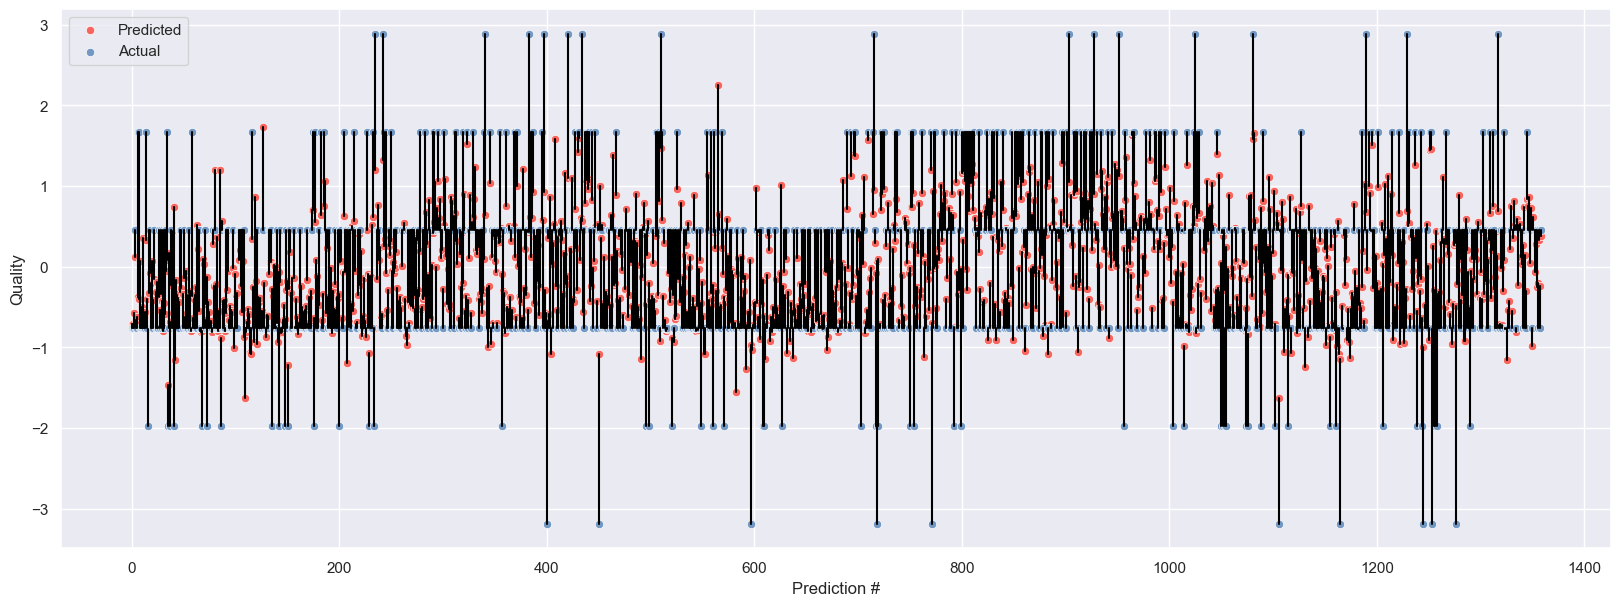

<Figure size 640x480 with 0 Axes>

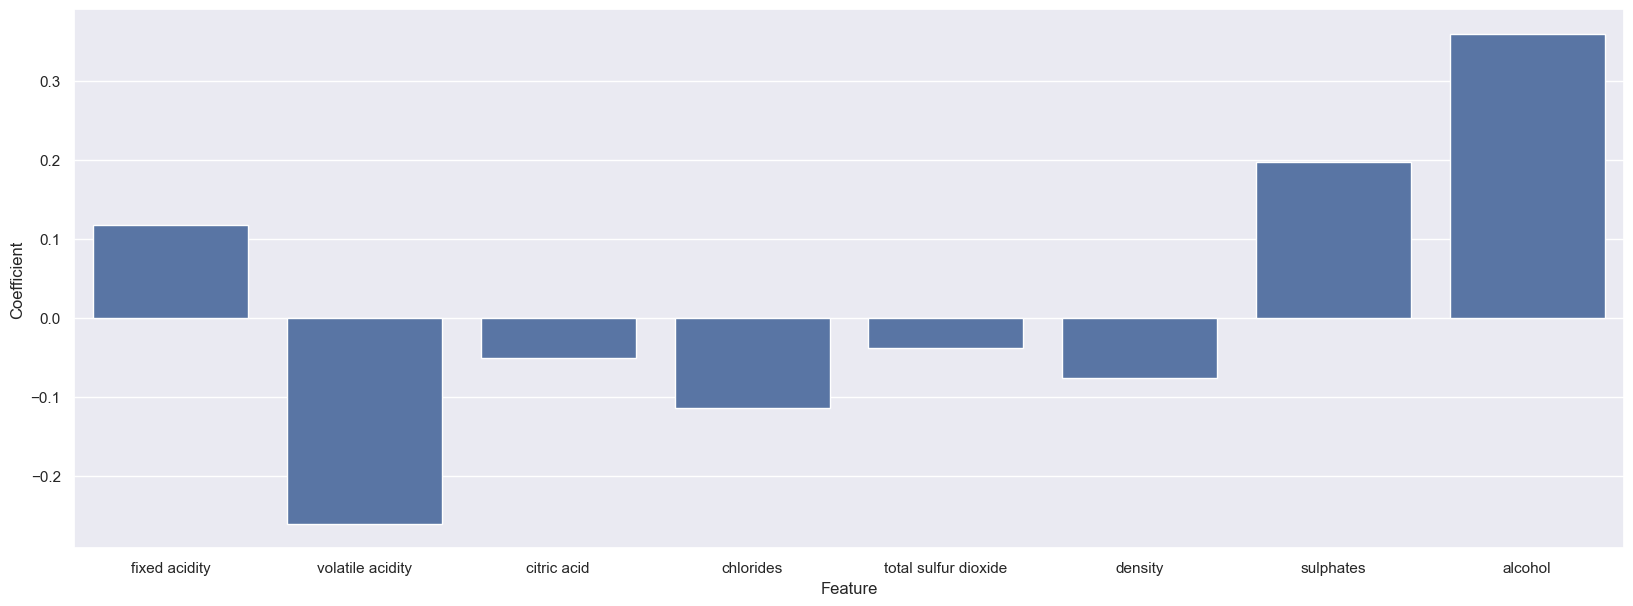

<Figure size 640x480 with 0 Axes>

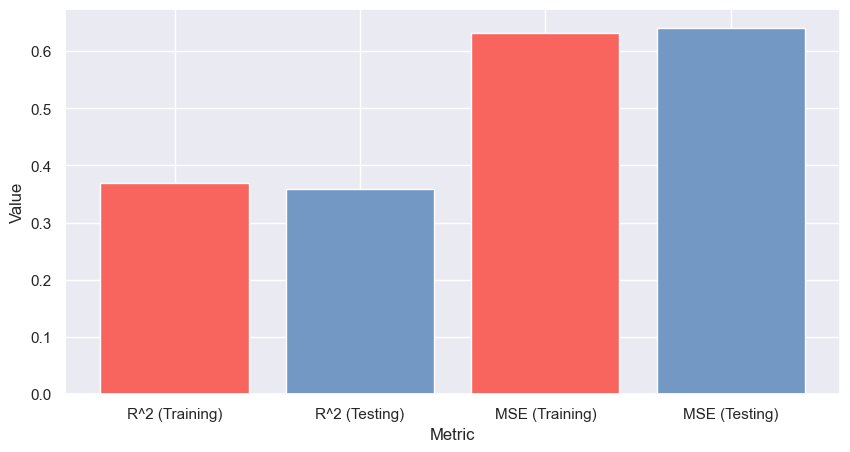

In [64]:
# create the model
print('Creating model...')
base_model = SGDRegressor(random_state=0)

# train the model with default parameters
print('Training model...')
base_model.fit(train.drop(columns='quality'), train['quality'])


def plot_model_predictions(model, test_data):
	plt.clf()
	# show the model's coefficients
	print('Model coefficients:', model.coef_)
	
	# show the model's MSE (mean squared error)
	print('Model MSE (training data):', ((model.predict(train.drop(columns='quality')) - train['quality']) ** 2).mean())
	print('Model MSE (testing data):', ((model.predict(test_data.drop(columns='quality')) - test_data['quality']) ** 2).mean())

	# show the model's R^2
	print('Model R^2 (training data):', model.score(train.drop(columns='quality'), train['quality']))
	print('Model R^2 (testing data):', model.score(test_data.drop(columns='quality'), test_data['quality']))

	# use a seaborn graph to show the model's predictions (red, with line going to the actual value, blue)
	print('Creating graph...')
	sns.set_theme()
	plt.figure(figsize=(20, 7))
	sns.scatterplot(x=range(len(test_data['quality'])), y=model.predict(test_data.drop(columns='quality')), color='#f7655e', label='Predicted')
	sns.scatterplot(x=range(len(test_data['quality'])), y=test_data['quality'], color='#7398c4', label='Actual')
	
	# draw lines from the actual value to the predicted value
	for i in range(len(test_data['quality'])):
		plt.plot([i, i], [test_data['quality'][i], model.predict(test_data.drop(columns='quality'))[i]], color='black')
	plt.xlabel('Prediction #')
	plt.ylabel('Quality')

	plt.show()
	plt.clf()
	
	# draw a simple graph that shows the model coefficients as a bar graph
	plt.figure(figsize=(20, 7))
	sns.barplot(x=test_data.drop(columns='quality').columns, y=model.coef_)
	plt.xlabel('Feature')
	plt.ylabel('Coefficient')
	
	plt.show()
	plt.clf()
	
	# draw a graph that shows the R^2 and MSE of the model
	plt.figure(figsize=(10, 5))
	plt.bar(['R^2 (Training)', 'R^2 (Testing)', 'MSE (Training)', 'MSE (Testing)'],
	[model.score(train.drop(columns='quality'), train['quality']),
	model.score(test_data.drop(columns='quality'), test_data['quality']),
	((model.predict(train.drop(columns='quality')) - train['quality']) ** 2).mean(),
	((model.predict(test_data.drop(columns='quality')) - test_data['quality']) ** 2).mean()],
	color=['#f7655e', '#7398c4', '#f7655e', '#7398c4'])
	plt.xlabel('Metric')
	plt.ylabel('Value')

	plt.show()
	

plot_model_predictions(base_model, test_data=data)

Creating model...
Training model...
Model coefficients: [ 0.1175196  -0.26084803 -0.05025313 -0.11400616 -0.03801809 -0.07653115
  0.19722598  0.35986688]
Model MSE (training data): 0.6310140687775558
Model MSE (testing data): 0.641128121929496
Model R^2 (training data): 0.37000877977194546
Model R^2 (testing data): 0.358871878070504
Creating graph...


<Figure size 640x480 with 0 Axes>

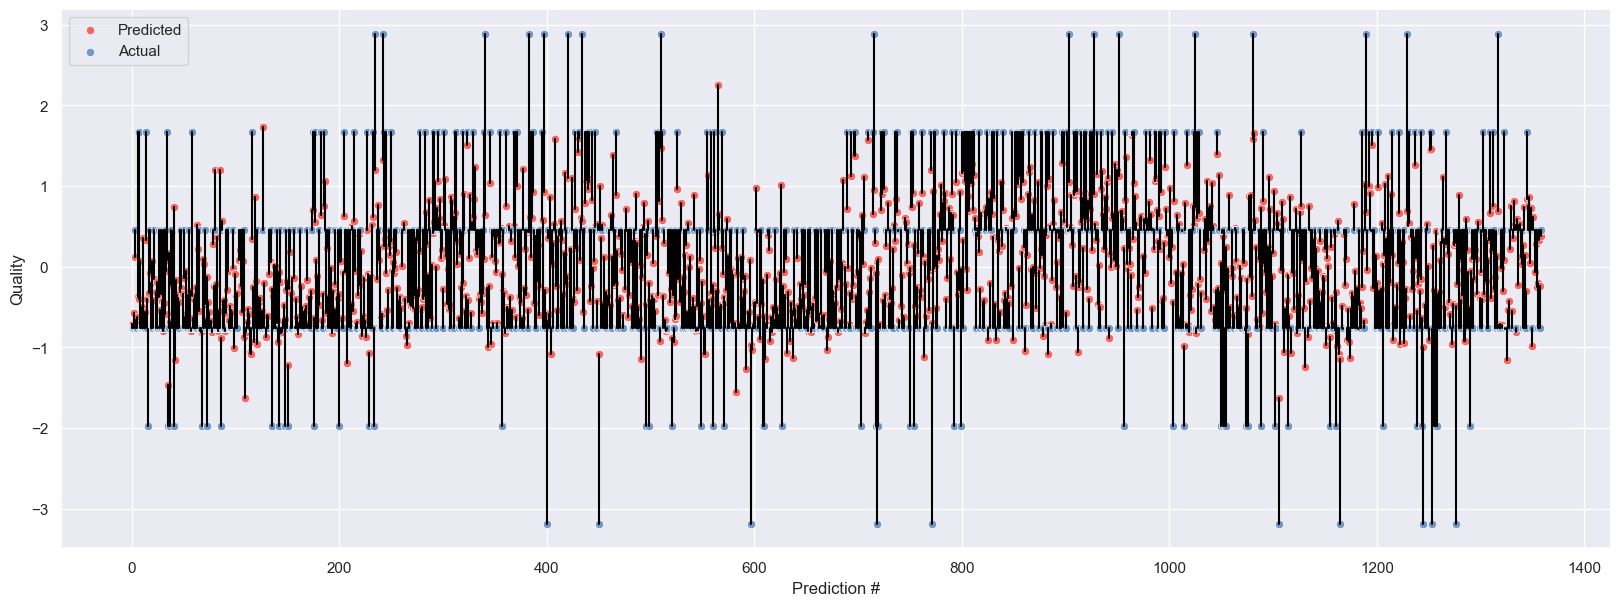

<Figure size 640x480 with 0 Axes>

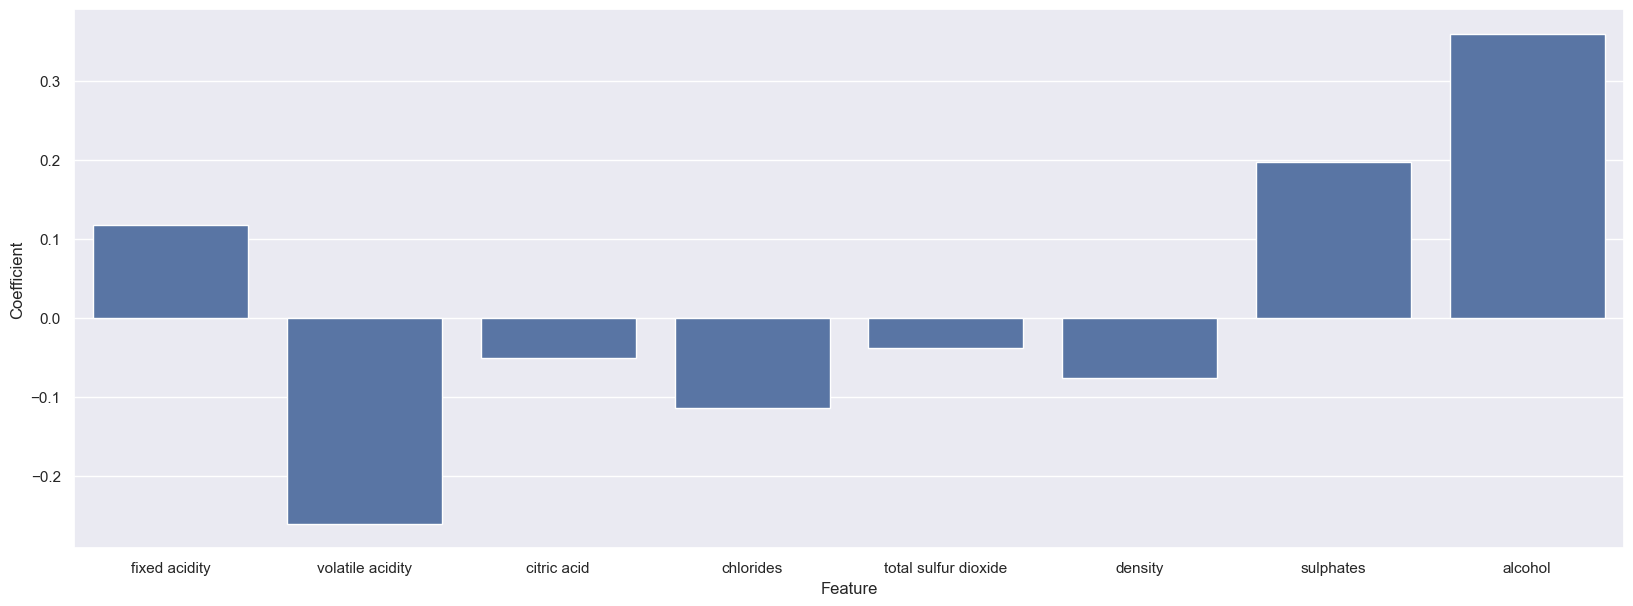

<Figure size 640x480 with 0 Axes>

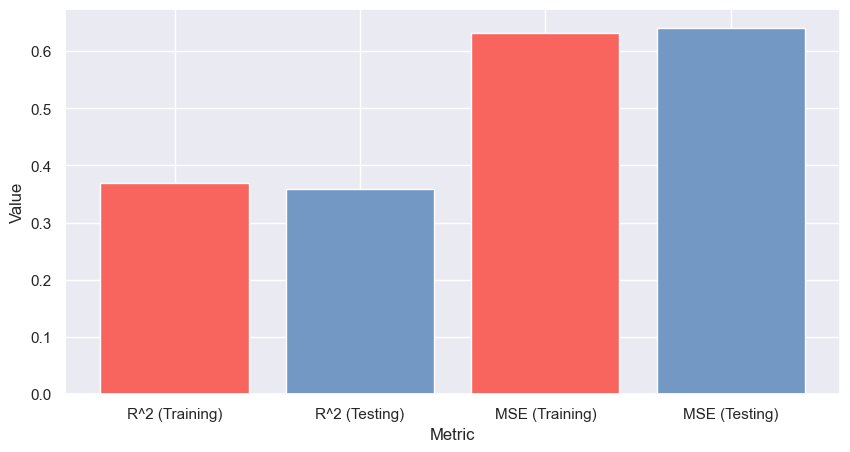

In [65]:
# create the model
print('Creating model...')
base_model_improved = SGDRegressor(random_state=0, penalty='elasticnet', alpha=0.0001, max_iter=1000, tol=1e-3)

# train the model with updated parameters
print('Training model...')
base_model_improved.fit(train.drop(columns='quality'), train['quality'])

# show the performance
plot_model_predictions(base_model_improved, test_data=data)

Creating model...
Training model...
Model coefficients: [ 0.08891245 -0.28682844 -0.08312397 -0.09949829 -0.03603392 -0.05716615
  0.20113492  0.39051975]
Model MSE (training data): 0.6320531276615443
Model MSE (testing data): 0.6435312981629235
Model R^2 (training data): 0.36897140516082017
Model R^2 (testing data): 0.35646870183707646
Creating graph...


<Figure size 640x480 with 0 Axes>

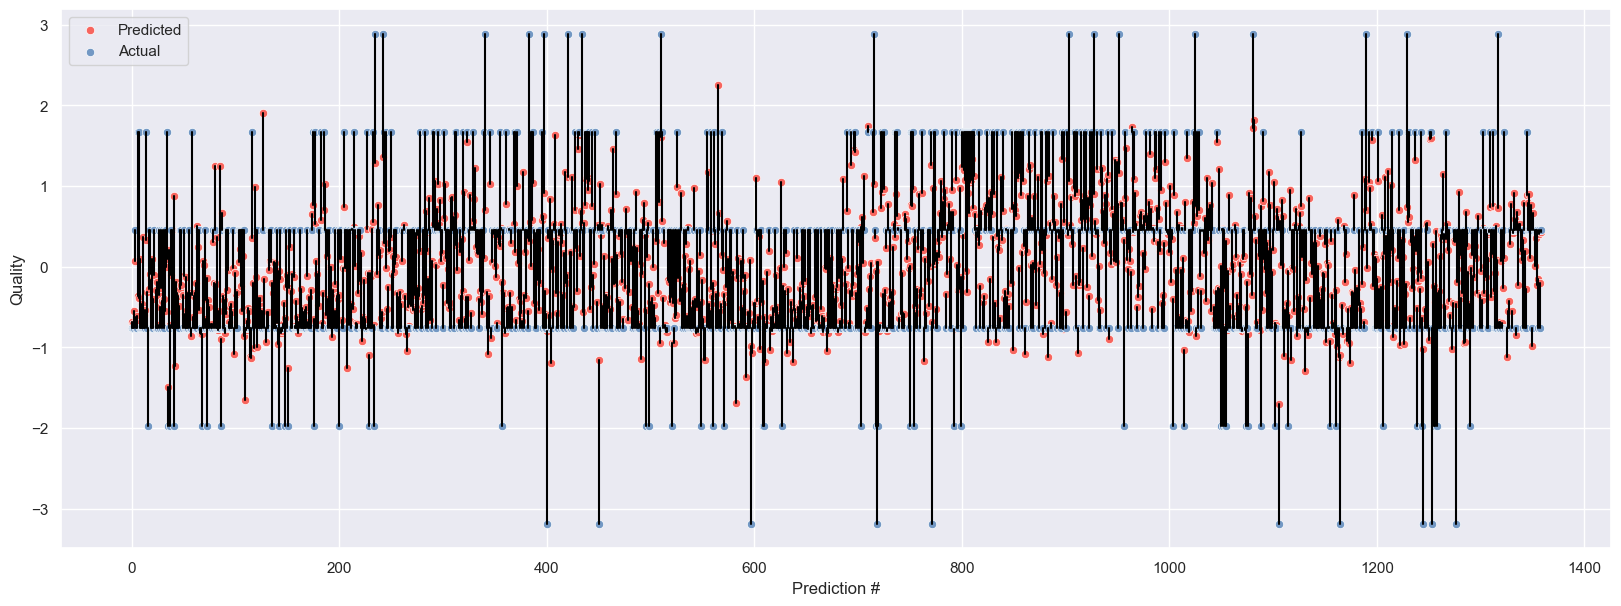

<Figure size 640x480 with 0 Axes>

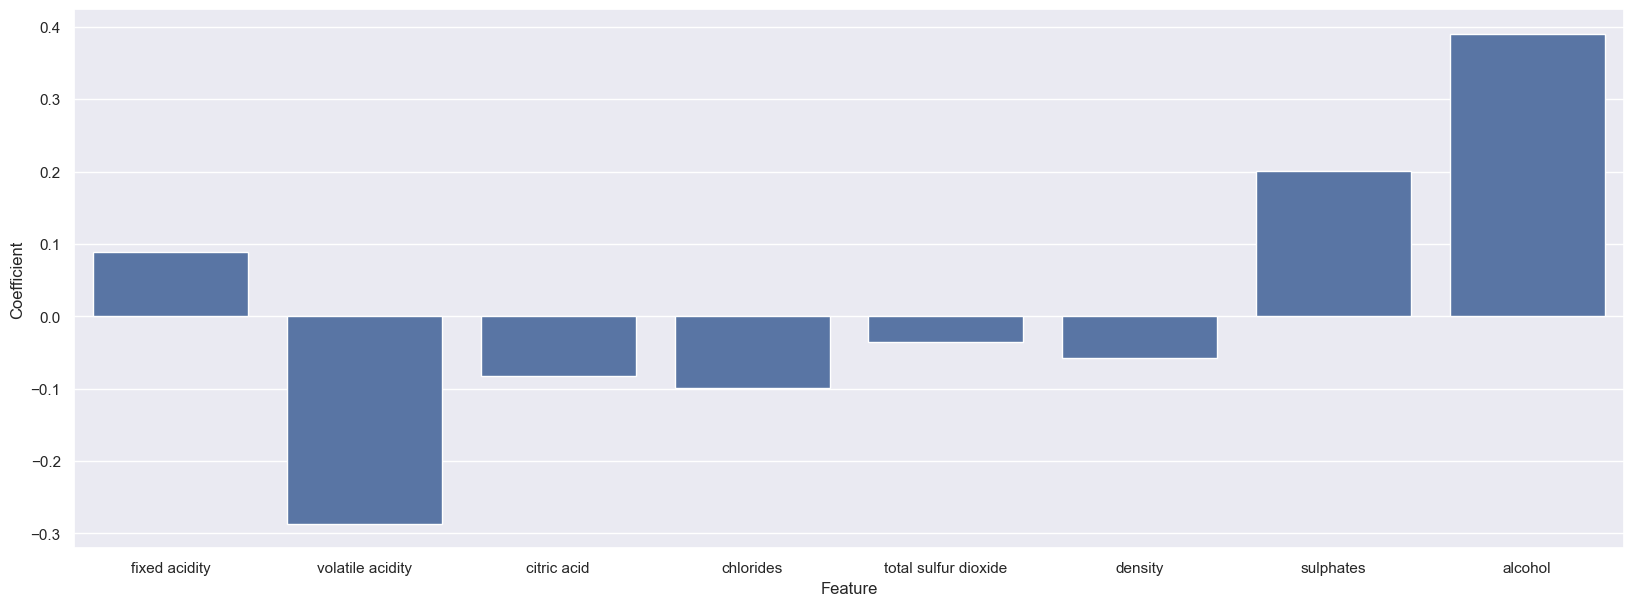

<Figure size 640x480 with 0 Axes>

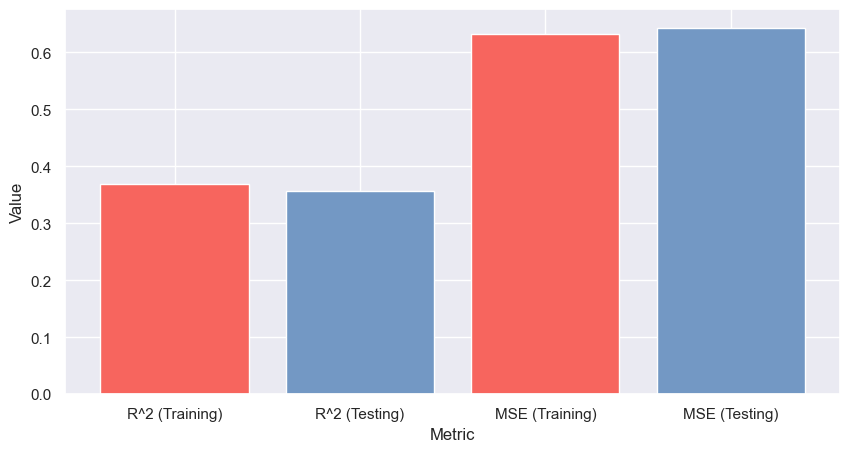

In [66]:
# create the model
print('Creating model...')
base_model_improved = SGDRegressor(random_state=0, penalty='l2', learning_rate='adaptive', max_iter=2000, tol=1e-3, early_stopping=True)

# train the model with updated parameters
print('Training model...')
base_model_improved.fit(train.drop(columns='quality'), train['quality'])

# show the performance
plot_model_predictions(base_model_improved, test_data=data)

# Summary

It appears that no matter what we do, there is a non-linear relationship that is difficult to capture with a linear model. We seem to be stuck at this score no matter what we change with the parameters. It seems likely to me that no matter what we do we will almost always fall into a similar local optima.

I do not think I have achieved the greatest result possible, but I do think I achieved near the greatest result possible using a simple linear model. Perhaps using a non-linear model it would be possible to improve on this (to me this seems likely). One reason for this might be due to the fact that, just because having more than a small amount of residual sugar is good, having a ton of residual sugar in the wine can likely ruin it as well - thus the linear relationship is not maintained.

This seems especially likely considering that the highest weighted coefficients are alcohol and sulphates, which are likely to have a non-linear relationship with quality.
